In [ ]:
!pip install prophet

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [34]:
df = pd.read_csv('/content/rainfall_area-wt_India_1901-2015.csv')
df.head()

,REGION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,INDIA,1901,34.7,37.7,18.0,39.3,50.8,113.4,242.2,272.9,124.4,52.7,38.0,8.3,1032.3,72.4,108.1,752.8,99.0
1,INDIA,1902,7.4,4.3,19.0,43.5,48.3,108.8,284.0,199.7,201.5,61.5,27.9,24.4,1030.2,11.7,110.8,794.0,113.8
2,INDIA,1903,17.0,8.3,31.3,17.1,59.5,118.3,297.0,270.4,199.1,117.9,36.9,17.7,1190.5,25.3,107.9,884.8,172.5
3,INDIA,1904,14.4,9.6,31.8,33.1,72.4,164.8,261.0,206.4,129.6,69.0,11.2,16.3,1019.8,24.0,137.4,761.8,96.6
4,INDIA,1905,25.3,20.9,42.7,33.7,55.7,93.3,252.8,200.8,178.4,51.4,9.7,10.5,975.3,46.2,132.2,725.4,71.6


In [35]:
annual_rainfall = df[['YEAR', 'ANNUAL']]
annual_rainfall

,YEAR,ANNUAL
0,1901,1032.3
1,1902,1030.2
2,1903,1190.5
3,1904,1019.8
4,1905,975.3
...,...,...
110,2011,1110.1
111,2012,1073.5
112,2013,1216.2
113,2014,1033.7


In [36]:
fig_annual = go.Figure()
fig_annual.add_trace(go.Scatter(x=df['YEAR'],
                                y=df['ANNUAL'],
                                mode='lines',
                                name='Annual Rainfall',
                                line=dict(color='blue', width=2),
                                opacity=0.7))

fig_annual.add_trace(go.Scatter(x=df['YEAR'],
                                y=[df['ANNUAL'].mean()] * len(df),
                                mode='lines',
                                name='Mean Rainfall',
                                line=dict(color='red', dash='dash')))
fig_annual.update_layout(
    title='Trend in Annual Rainfall in India (1901-2015)',
    xaxis_title='Year',
    yaxis_title='Rainfall (mm)',
    template='plotly_white',
    legend=dict(title='Legend'),
    height=500
)
fig_annual.show()

In [37]:
# identify months with the highest and lowest rainfall on average
monthly_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
monthly_avg = df[monthly_columns].mean()
monthly_avg

,0
JAN,19.759130
FEB,23.434783
MAR,28.254783
APR,38.241739
MAY,62.193913
JUN,168.360000
JUL,291.022609
AUG,258.400870
SEP,172.473043
OCT,75.701739


In [38]:
highest_rainfall_month = monthly_avg.idxmax()
lowest_rainfall_month = monthly_avg.idxmin()

print(highest_rainfall_month)
print(lowest_rainfall_month)

JUL
DEC


In [39]:
fig_monthly = px.bar(
    x=monthly_avg.index,
    y=monthly_avg.values,
    labels={'x': 'Month', 'y': 'Rainfall (mm)'},
    title='Average Monthly Rainfall in India (1901-2015)',
    text=monthly_avg.values,
    template='plotly_white'
)

fig_monthly.add_hline(
    y=monthly_avg.mean(),
    line_dash='dash',
    line_color='red',
    annotation_text='Mean Rainfall',
    annotation_position='top right'
)
fig_monthly.update_traces(marker_color='skyblue', marker_line_color='black', marker_line_width=1)
fig_monthly.update_layout(template='plotly_white', height=500)
fig_monthly.show()

In [40]:
# seasonal rainfall distribution
seasonal_columns = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
seasonal_avg = df[seasonal_columns].mean()
seasonal_avg

,0
Jan-Feb,43.189565
Mar-May,128.694783
Jun-Sep,890.260870
Oct-Dec,119.882609


In [41]:
fig_seasonal = px.bar(
    x=seasonal_avg.index,
    y=seasonal_avg.values,
    labels={'x': 'Season', 'y': 'Rainfall (mm)'},
    title='Average Seasonal Rainfall in India (1901-2015)',
    text=seasonal_avg.values,
    color=seasonal_avg.values,
    color_continuous_scale='Viridis',
)
fig_seasonal.update_traces(marker_line_color='black', marker_line_width=1)
fig_seasonal.update_layout(
    template='plotly_white',
    height=500,
    coloraxis_colorbar=dict(title='mm')
)
fig_seasonal.update_layout(template='plotly_white', height=500)
fig_seasonal.show()

In [42]:
df['10-Year Rolling AVG'] = df['ANNUAL'].rolling(window=10).mean()

fig_climate_change = go.Figure()
fig_climate_change.add_trace(go.Scatter(
    x=df['YEAR'],
    y=df['ANNUAL'],
    mode='lines',
    name='Annual Rainfall',
    line=dict(color='blue', width=2),
    opacity=0.6
))
fig_climate_change.add_trace(go.Scatter(
    x=df['YEAR'],
    y=df['10-Year Rolling AVG'],
    mode='lines',
    name='10-Year Rolling Average',
    line=dict(color='red', width=3),
))
fig_climate_change.update_layout(
    title='Impact of Climate Change on Rainfall in India',
    xaxis_title='Year',
    yaxis_title='Rainfall (mm)',
    template='plotly_white',
    legend=dict(title='Legend'),
    height=500
)
fig_climate_change.show()

In [43]:
from scipy.stats import pearsonr

mean_rainfall = df['ANNUAL'].mean()
std_dev_rainfall = df['ANNUAL'].std()

print(f"Mean of Rainfall: {mean_rainfall}")
print(f"Standard Devation of Rainfall: {std_dev_rainfall}")

Mean of Rainfall: 1182.0347826086959
Standard Devation of Rainfall: 110.68621448854056


In [44]:
drought_years = df[df['ANNUAL'] < (mean_rainfall - 1.5 * std_dev_rainfall)]
extreme_rainfall_years = df[df['ANNUAL'] > (mean_rainfall + 1.5 * std_dev_rainfall)]

In [45]:
# correlating seasonal rainfall with annual rainfall totals
seasonal_columns = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
seasonal_correlations = {
    season: pearsonr(df[season], df['ANNUAL'])[0] for season in seasonal_columns
}

drought_years_summary = drought_years[['YEAR','ANNUAL']].reset_index(drop=True)
extreme_rainfall_years_summary = extreme_rainfall_years[['YEAR', 'ANNUAL']].reset_index(drop=True)
seasonal_correlations_summary = pd.DataFrame.from_dict(seasonal_correlations, orient='index', columns=['Correlation'])
drought_years_summary, extreme_rainfall_years_summary, seasonal_correlations_summary

(   YEAR  ANNUAL
 0  1905   975.3
 1  1965   938.4
 2  1972   948.5
 3  2002   920.8
 4  2009   959.3,
    YEAR  ANNUAL
 0  1917  1480.3
 1  1933  1393.5
 2  1956  1386.2
 3  1959  1382.1
 4  1961  1403.0
 5  1988  1351.0
 6  1990  1400.6,
          Correlation
 Jan-Feb     0.228913
 Mar-May     0.313057
 Jun-Sep     0.930027
 Oct-Dec     0.531648)

In [46]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(contamination=0.05, random_state=42)
df['Annual Anomaly'] = isolation_forest.fit_predict(df[['ANNUAL']])
df['Annual Anomaly']

,Annual Anomaly
0,1
1,1
2,1
3,1
4,-1
...,...
110,1
111,1
112,1
113,1


In [47]:
annual_anomalies = df[df['Annual Anomaly'] == -1]
monthly_data = df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
monthly_anomalies = isolation_forest.fit_predict(monthly_data)
monthly_anomalies

array([ 1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [48]:
df['Monthly Anomaly'] = monthly_anomalies
df[df['Monthly Anomaly'] == -1][['YEAR'] + monthly_columns]

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
6,1907,16.2,46.0,37.8,62.8,32.6,154.4,225.4,310.4,96.9,22.7,22.5,12.1
10,1911,45.7,5.6,49.9,22.8,47.6,191.9,162.7,213.5,182.3,70.6,42.8,12.0
16,1917,8.7,38.7,22.8,43.2,75.0,231.8,285.2,296.5,281.0,158.8,28.2,10.3
17,1918,12.2,4.4,41.6,38.8,102.8,212.6,183.8,242.7,109.7,20.0,41.1,16.4
66,1967,11.2,13.4,63.3,29.1,42.4,144.9,304.6,262.9,170.4,40.3,11.4,54.4
89,1990,14.9,44.3,53.3,42.0,114.5,194.0,286.7,293.2,196.6,103.2,29.5,28.4


In [49]:
fig_annual_anomalies = go.Figure()

fig_annual_anomalies.add_trace(go.Scatter(
    x=df['YEAR'],
    y=df['ANNUAL'],
    mode='lines',
    name='Annual Rainfall',
    line=dict(color='blue', width=2),
    opacity=0.6
))

fig_annual_anomalies.add_trace(go.Scatter(
    x=annual_anomalies['YEAR'],
    y=annual_anomalies['ANNUAL'],
    mode='markers',
    name='Anomalous Years',
    marker=dict(color='red', size=8, symbol='circle')
))

fig_annual_anomalies.add_hline(
    y=df['ANNUAL'].mean(),
    line_dash='dash',
    line_color='green',
    annotation_text='Mean Rainfall',
    annotation_position='top right'
)

fig_annual_anomalies.update_layout(
    title='Annual Rainfall Anomalies in India',
    xaxis_title='Year',
    yaxis_title='Rainfall (mm)',
    template='plotly_white',
    legend=dict(title='Legend'),
    height=500
)
fig_annual_anomalies.show()

In [50]:
# correlation analysis between monsoon (Jun-Sep) rainfall and other seasons
seasonal_columns = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
moonsoon_columns = 'Jun-Sep'

relationships = {}

for season in seasonal_columns:
    if season != moonsoon_columns:
        corr, _ = pearsonr(df[moonsoon_columns], df[season])
        relationships[season] = corr

correlation_data = pd.DataFrame({
    'Season': list(relationships.keys()),
    'Correlation Coefficient': list(relationships.values())
})
correlation_data

,Season,Correlation Coefficient
0,Jan-Feb,0.142731
1,Mar-May,0.104340
2,Oct-Dec,0.286520


In [51]:
relationships.keys()

dict_keys(['Jan-Feb', 'Mar-May', 'Oct-Dec'])

In [52]:
relationships.values()

dict_values([np.float64(0.14273134438067203), np.float64(0.10433984966925225), np.float64(0.28651956453523547)])

In [53]:
list(relationships.keys())

['Jan-Feb', 'Mar-May', 'Oct-Dec']

In [54]:
list(relationships.values())

[np.float64(0.14273134438067203),
 np.float64(0.10433984966925225),
 np.float64(0.28651956453523547)]

In [55]:
fig = px.bar(
    correlation_data,
    x='Season',
    y='Correlation Coefficient',
    title='Correlation Between Monsoon Rainfall and Other Seasons',
    labels={'Season': 'Season', 'Correlation Coefficient': 'Correlation Coefficient'},
    color_continuous_scale='Viridis',
    text='Correlation Coefficient',
)

fig.update_traces(marker_line_color='black', marker_line_width=1, texttemplate='%{text:.2f}')
fig.show()

In [56]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

rainfall_features = df[['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec', 'ANNUAL']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(rainfall_features)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)
df['Cluster']

,Cluster
0,3
1,3
2,2
3,3
4,3
...,...
110,1
111,1
112,2
113,3


In [57]:
fig = px.scatter(
    df,
    x='YEAR',
    y='ANNUAL',
    color='Cluster',
    title='Cluster Analysis of Rainfall Data',
    labels={'YEAR': 'Year', 'ANNUAL': 'Annual Rainfall (mm)'}
)
fig.show()

In [58]:
df.groupby('Cluster')['ANNUAL'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,21.0,1317.080952,69.243365,1214.6,1272.400,1308.90,1351.000,1480.3
1,36.0,1173.708333,45.378015,1073.5,1143.925,1173.50,1214.625,1247.0
2,28.0,1238.992857,61.764936,1132.0,1201.550,1217.10,1275.350,1386.2
3,30.0,1044.333333,52.695032,920.8,1027.200,1049.15,1078.700,1137.2


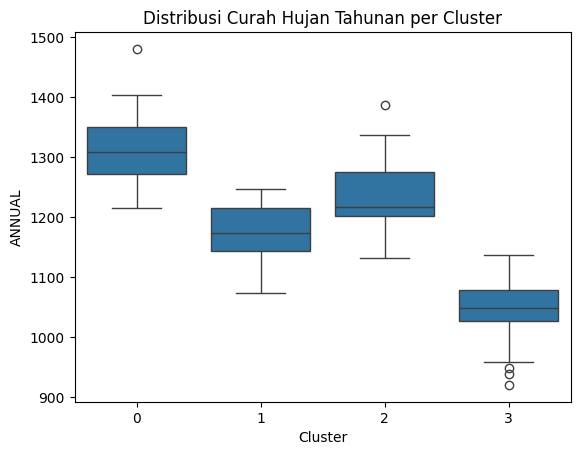

In [59]:
sns.boxplot(x='Cluster', y='ANNUAL', data=df)
plt.title('Distribusi Curah Hujan Tahunan per Cluster')
plt.show()

In [60]:
cluster_labels = {
    3: 'Very Dry',
    1: 'Dry',
    2: 'Normal',
    0: 'Wet'
}
df['Cluster'] = df['Cluster'].map(cluster_labels)

In [64]:
fig = px.scatter(
    df,
    x='YEAR',
    y='ANNUAL',
    color='Cluster',
    title='Cluster Analysis of Rainfall Data',
    labels={'YEAR': 'Year', 'ANNUAL': 'Annual Rainfall (mm)'},
    color_discrete_sequence=px.colors.qualitative.Set2,
)
fig.show()

In [68]:
df['DATE'] = pd.to_datetime(df['YEAR'], format='%Y')
df[['DATE', 'YEAR']]

,DATE,YEAR
0,1901-01-01,1901
1,1902-01-01,1902
2,1903-01-01,1903
3,1904-01-01,1904
4,1905-01-01,1905
...,...,...
110,2011-01-01,2011
111,2012-01-01,2012
112,2013-01-01,2013
113,2014-01-01,2014


In [70]:
annual_rainfal_ts = df.set_index('DATE')['ANNUAL']
annual_rainfal_ts

,ANNUAL
DATE,
1901-01-01,1032.3
1902-01-01,1030.2
1903-01-01,1190.5
1904-01-01,1019.8
1905-01-01,975.3
...,...
2011-01-01,1110.1
2012-01-01,1073.5
2013-01-01,1216.2


In [76]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

df_prophet = annual_rainfal_ts.reset_index()
df_prophet.rename(
    columns = {
        'DATE': 'ds',
        'ANNUAL': 'y'
    },
    inplace=True
)

In [77]:
model = Prophet()
model.fit(df_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeqqx6rsk/clvbk03q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeqqx6rsk/2pl_uhei.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12223', 'data', 'file=/tmp/tmpeqqx6rsk/clvbk03q.json', 'init=/tmp/tmpeqqx6rsk/2pl_uhei.json', 'output', 'file=/tmp/tmpeqqx6rsk/prophet_model6bmbcxht/prophet_model-20250724035426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:54:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:54:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [78]:
future_df = model.make_future_dataframe(periods=20, freq='Y')
future_df

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



,ds
0,1901-01-01
1,1902-01-01
2,1903-01-01
3,1904-01-01
4,1905-01-01
...,...
130,2030-12-31
131,2031-12-31
132,2032-12-31
133,2033-12-31


In [79]:
forecast = model.predict(future_df)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1901-01-01,1040.639058,1020.182698,1282.208625,1040.639058,1040.639058,109.209867,109.209867,109.209867,109.209867,109.209867,109.209867,0.0,0.0,0.0,1149.848924
1,1902-01-01,1042.630915,1014.309568,1271.446347,1042.630915,1042.630915,105.991464,105.991464,105.991464,105.991464,105.991464,105.991464,0.0,0.0,0.0,1148.622379
2,1903-01-01,1044.622773,1005.572507,1279.503666,1044.622773,1044.622773,102.693790,102.693790,102.693790,102.693790,102.693790,102.693790,0.0,0.0,0.0,1147.316563
3,1904-01-01,1046.614630,1019.738642,1268.078590,1046.614630,1046.614630,99.320858,99.320858,99.320858,99.320858,99.320858,99.320858,0.0,0.0,0.0,1145.935488
4,1905-01-01,1048.611945,1028.295784,1293.980037,1048.611945,1048.611945,109.209867,109.209867,109.209867,109.209867,109.209867,109.209867,0.0,0.0,0.0,1157.821812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2030-12-31,1007.262574,961.543851,1226.570894,1004.035474,1011.176347,88.791989,88.791989,88.791989,88.791989,88.791989,88.791989,0.0,0.0,0.0,1096.054563
131,2031-12-31,1005.928207,953.138855,1235.322071,1002.418656,1010.178621,85.159912,85.159912,85.159912,85.159912,85.159912,85.159912,0.0,0.0,0.0,1091.088119
132,2032-12-31,1004.590185,966.821799,1240.939876,1000.743653,1009.308087,95.876772,95.876772,95.876772,95.876772,95.876772,95.876772,0.0,0.0,0.0,1100.466957
133,2033-12-31,1003.255819,965.602060,1220.091311,999.070312,1008.249597,92.365725,92.365725,92.365725,92.365725,92.365725,92.365725,0.0,0.0,0.0,1095.621544


In [81]:
fig_forecast = plot_plotly(model, forecast)
fig_forecast.update_layout(
    title='Forecasting Annual Rainfall',
    xaxis_title='Date',
    yaxis_title='Rainfall (mm)',
    template='plotly_white',
    height=500
)
fig_forecast.show()